In [2]:
!git clone https://github.com/njucckevin/SeeClick.git

Cloning into 'SeeClick'...
remote: Enumerating objects: 642, done.
remote: Counting objects: 100% (642/642), done.
remote: Compressing objects: 100% (496/496), done.
remote: Total 642 (delta 171), reused 586 (delta 123), pack-reused 0 (from 0)
Receiving objects: 100% (642/642), 6.94 MiB | 26.14 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [ ]:
pip install -r SeeClick/requirements.txt

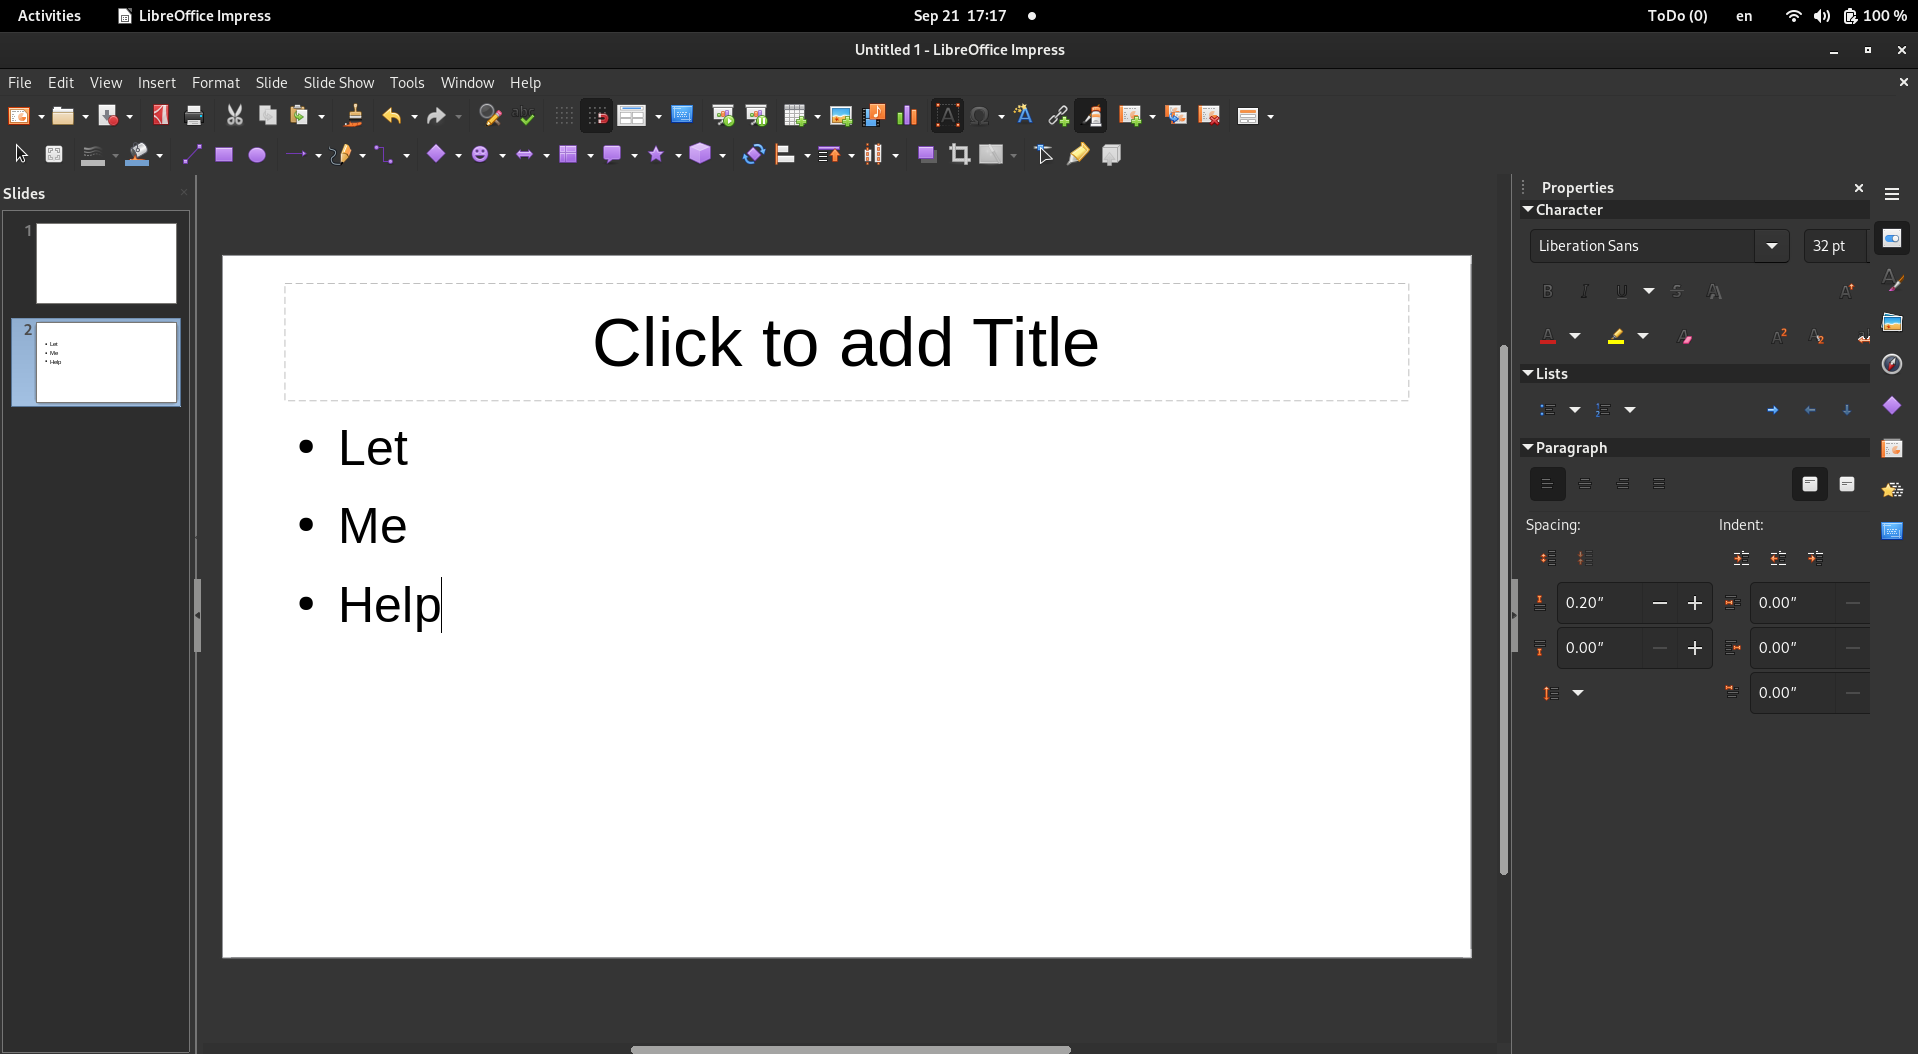

In [7]:
from IPython.display import Image
Image(filename='screenshot1.png')

In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL-Chat", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("cckevinn/SeeClick", trust_remote_code=True, bf16=True).eval()
model.generation_config = GenerationConfig.from_pretrained("Qwen/Qwen-VL-Chat", trust_remote_code=True)

img_path = "screenshot1.png"
prompt = "In this UI screenshot, what is the position of the element corresponding to the View menu (with bbox)?" # or (with point)
query = tokenizer.from_list_format([
    {'image': img_path},
    {'text': prompt},
])
response, history = model.chat(tokenizer, query=query, history=None)

# The prediction output represents the point of (x, y) or the bounding box of (left, top, right, down), each value is a [0, 1] decimal number indicating the ratio of the corresponding position to the width or height of the image. 
# For the View menu: (0.05,0.07,0.07,0.09)
print(response)

Loading checkpoint shards:   0%|          | 0/10 [00:00<?, ?it/s]

(0.05,0.07,0.07,0.09)


In [24]:
import decimal
from PIL import Image, ImageDraw

# Confirm the results

# Original image size (pixels)
im = Image.open('screenshot1.png')
width, height = im.size
print(width, height)

# Convert the bounding box response from [0, 1] to the original 
# Format: (left, top, right, down)
response = response.replace("(", "")
response = response.replace(")", "")
bbox_coordinates = [decimal.Decimal(x.strip()) for x in response.split(',')]
left = bbox_coordinates[0] * width
top = bbox_coordinates[1] * height
right = bbox_coordinates[2] * width
down = bbox_coordinates[3] * height
print(left, top, right, down)

# Draw dots on the screenshot
draw = ImageDraw.Draw(im)
draw.rectangle([left, top, right, down], outline="red")
im

# Cut it out
im2 = im.crop((left, top, right, down))
im2


1918 1054
95.90 73.78 134.26 94.86
